 **Rain Predictor**

---

[link text](https://)

**Used Logistic Regression Model**

**Linear Regression for Solving Regression Problems**

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).

**Logistic Regression**
Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:


1.    We take linear combination (or weighted sum of the input features)

2.    We apply the sigmoid function to the result to obtain a number between 0 1

3.    This number represents the probability of the input being classified as "

4.    Instead of RMSE, the Cross Entropy Loss function is used to evaluate the
       results


Visual Summary:


<img src="https://i.imgur.com/YMaMo5D.png" width="480">


The sigmoid function applied to the linear combination of inputs has the following formula:


<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. In short, we have to evaluate the Weights and the Biases by optimising (minimising) the loss function.


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Reading, Exploring and Cleaning the Data

In [3]:
RawData = pd.read_csv("weatherdata.csv")
RawData.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [4]:
RawData['Rainfall'].fillna(np.mean(RawData['Rainfall']), inplace = True)
RawData.dropna(inplace = True)

In [5]:
Data = RawData.sort_values(by='Date')
Data.drop(['MinTemp','MaxTemp','Evaporation', 'WindGustDir',
           'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am',
           'WindSpeed3pm', 'Pressure9am','Pressure3pm'], axis=1, inplace=True)
Data.reset_index(drop =True,inplace = True)
Data.index += 1

In [6]:
Data['Humidity'] = Data.apply(lambda row: (row['Humidity9am'] + row['Humidity3pm']) / 2, axis=1)
Data['Cloud'] = Data.apply(lambda row: (row['Cloud9am'] + row['Cloud3pm']) / 2, axis=1)
Data['Temp'] = Data.apply(lambda row: (row['Temp9am'] + row['Temp3pm']) / 2, axis=1)

In [7]:
Data.drop(['Humidity9am', 'Humidity3pm', 'Cloud9am',
           'Cloud3pm', 'Temp9am','Temp3pm'],axis=1,inplace=True)

In [8]:
Data = Data[['Date', 'Location', 'Rainfall', 'Sunshine',
             'Humidity', 'Cloud', 'Temp', 'RainToday', 'RainTomorrow']]

In [9]:
Data['RainToday'] =Data['RainToday'].astype('category')
Data['RainToday'] =Data['RainToday'].cat.codes
Data['RainTomorrow'] =Data['RainTomorrow'].astype('category')
Data['RainTomorrow'] =Data['RainTomorrow'].cat.codes
Data

,Date,Location,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday,RainTomorrow
1,2007-11-01,Canberra,0.0,6.3,48.5,7.0,19.00,0,1
2,2007-11-02,Canberra,3.6,9.7,58.0,4.0,21.60,1,1
3,2007-11-03,Canberra,3.6,3.3,75.5,7.5,17.80,1,1
4,2007-11-04,Canberra,39.8,9.1,59.0,4.5,13.80,1,1
5,2007-11-05,Canberra,2.8,10.6,58.5,7.0,13.25,1,0
...,...,...,...,...,...,...,...,...,...
56416,2017-06-25,Brisbane,0.0,9.8,60.5,4.5,19.25,0,0
56417,2017-06-25,PerthAirport,0.0,7.9,56.5,2.0,14.10,0,0
56418,2017-06-25,Melbourne,0.0,3.8,61.5,7.0,11.35,0,1
56419,2017-06-25,Perth,0.0,7.9,62.0,2.0,13.55,0,0


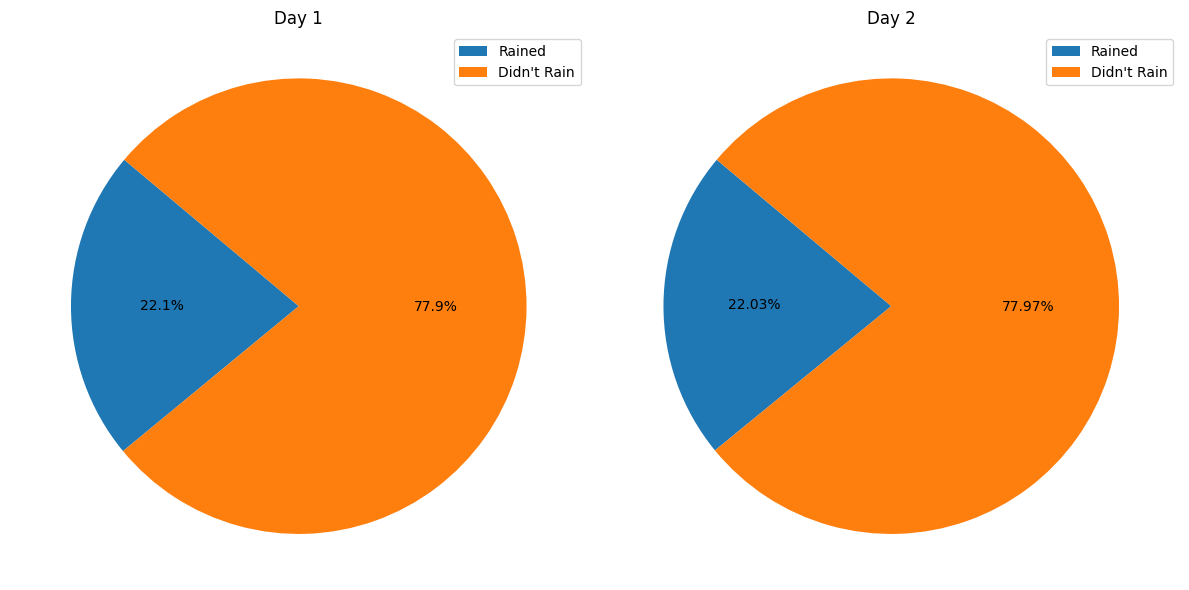

In [10]:
# Data for RainToday and RainTomorrow
labels = ['Rained', "Didn't Rain"]
Count0_today = (Data.query('RainToday == 0')).shape[0]
Count1_today = (Data.query('RainToday == 1')).shape[0]
PCT_today = [Count1_today / (Count0_today + Count1_today),
             Count0_today / (Count0_today + Count1_today)]

Count0_tomorrow = (Data.query('RainTomorrow == 0')).shape[0]
Count1_tomorrow = (Data.query('RainTomorrow == 1')).shape[0]
PCT_tomorrow = [Count1_tomorrow /(Count0_tomorrow + Count1_tomorrow),
                Count0_tomorrow/(Count0_tomorrow + Count1_tomorrow)]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for RainToday
axs[0].pie(PCT_today, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Day 1')
axs[0].legend(labels, loc="best")

# Plot for RainTomorrow
axs[1].pie(PCT_tomorrow, autopct='%1.2f%%', startangle=140)
axs[1].set_title('Day 2')
axs[1].legend(labels, loc="best")

# Equal aspect ratio ensures that pies are drawn as circles
axs[0].axis('equal')
axs[1].axis('equal')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Building the Model**

In [12]:
#Defining the X and Y variables
X = Data.drop(columns = ['RainTomorrow','Date','Location'])
Y = Data['RainTomorrow']

In [13]:
X

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
1,0.0,6.3,48.5,7.0,19.00,0
2,3.6,9.7,58.0,4.0,21.60,1
3,3.6,3.3,75.5,7.5,17.80,1
4,39.8,9.1,59.0,4.5,13.80,1
5,2.8,10.6,58.5,7.0,13.25,1
...,...,...,...,...,...,...
56416,0.0,9.8,60.5,4.5,19.25,0
56417,0.0,7.9,56.5,2.0,14.10,0
56418,0.0,3.8,61.5,7.0,11.35,0
56419,0.0,7.9,62.0,2.0,13.55,0


In [14]:
Y

,RainTomorrow
1,1
2,1
3,1
4,1
5,0
...,...
56416,0
56417,0
56418,1
56419,0


In [15]:
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,
                                             test_size = 0.20,
                                             random_state = 78)

In [16]:
XTest

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
25396,0.0,10.8,62.5,7.0,28.25,0
49597,0.0,13.1,16.0,0.5,32.10,0
43804,0.0,13.2,44.0,2.0,21.60,0
21648,0.0,10.8,49.5,0.5,14.10,0
21454,0.0,10.8,48.5,0.0,22.25,0
...,...,...,...,...,...,...
45515,0.0,5.1,71.5,4.5,20.05,0
49680,0.0,9.9,72.5,4.5,18.35,0
6786,0.0,10.2,63.0,1.5,26.55,0
17215,0.2,8.0,73.5,6.5,23.40,0


In [17]:
YTest

,RainTomorrow
25396,0
49597,0
43804,0
21648,0
21454,0
...,...
45515,0
49680,0
6786,0
17215,1


In [18]:
XTrain

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
6063,1.6,8.7,60.0,2.5,12.25,1
5785,0.0,8.2,67.5,3.5,11.65,0
10568,0.0,12.3,48.0,1.5,28.95,0
6039,0.0,9.0,64.0,2.0,12.15,0
44649,5.8,7.4,71.0,6.0,28.10,1
...,...,...,...,...,...,...
22634,0.0,10.3,38.0,6.5,17.50,0
36905,0.0,1.0,6.0,7.0,33.05,0
38808,4.4,3.0,73.5,7.5,21.55,1
16855,9.4,1.7,72.0,7.5,24.05,1


In [19]:
YTrain

,RainTomorrow
6063,0
5785,0
10568,0
6039,1
44649,0
...,...
22634,0
36905,0
38808,1
16855,0


In [20]:
sclr = StandardScaler()
#Scale training data
Scaled_XTrain = sclr.fit_transform(XTrain)
Scaled_XTrain =pd.DataFrame(Scaled_XTrain,columns=X.columns)
Scaled_XTrain.index+=1

#scale test data
Scaled_XTest = sclr.transform(XTest)
Scaled_XTest =pd.DataFrame(Scaled_XTest,columns=X.columns)
Scaled_XTest.index+=1

In [21]:
Scaled_XTrain

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
1,-0.076989,0.258669,0.124902,-0.731432,-1.263073,1.872416
2,-0.304243,0.125863,0.546311,-0.322879,-1.355633,-0.534069
3,-0.304243,1.214874,-0.549353,-1.139985,1.313187,-0.534069
4,-0.304243,0.338353,0.349653,-0.935708,-1.278499,-0.534069
5,0.519554,-0.086627,0.742968,0.698502,1.182060,1.872416
...,...,...,...,...,...,...
45132,-0.304243,0.683649,-1.111232,0.902779,-0.453171,-0.534069
45133,-0.304243,-1.786547,-2.909244,1.107055,1.945682,-0.534069
45134,0.320706,-1.255322,0.883438,1.311331,0.171611,1.872416
45135,1.030876,-1.600618,0.799156,1.311331,0.557279,1.872416


In [22]:
Scaled_XTest

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
1,-0.304243,0.816455,0.265371,1.107055,1.205200,-0.534069
2,-0.304243,1.427364,-2.347365,-1.548537,1.799128,-0.534069
3,-0.304243,1.453925,-0.774105,-0.935708,0.179324,-0.534069
4,-0.304243,0.816455,-0.465071,-1.548537,-0.977679,-0.534069
5,-0.304243,0.816455,-0.521259,-1.752813,0.279598,-0.534069
...,...,...,...,...,...,...
11280,-0.304243,-0.697536,0.771062,0.085673,-0.059790,-0.534069
11281,-0.304243,0.577404,0.827250,0.085673,-0.322044,-0.534069
11282,-0.304243,0.657088,0.293465,-1.139985,0.942946,-0.534069
11283,-0.275836,0.072740,0.883438,0.902779,0.457005,-0.534069


In [23]:
#finding the Coefficients and Intercept
log_reg = LogisticRegression(random_state=78,
                            C=0.05,
                            fit_intercept=True).fit(Scaled_XTrain,
                                                  YTrain)

In [24]:
YPred = log_reg.predict(Scaled_XTest)
YPred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

**Bias**

In [25]:
b = log_reg.intercept_[0]
b

np.float64(-1.7474079629413135)

 **Weights**

In [26]:
w = pd.DataFrame({"Coefficients": log_reg.coef_[0]},
                       index=X.columns)
w

,Coefficients
Rainfall,0.100784
Sunshine,-0.672634
Humidity,0.637665
Cloud,0.331290
Temp,0.316143
RainToday,0.227092


**Confusion Matrix**

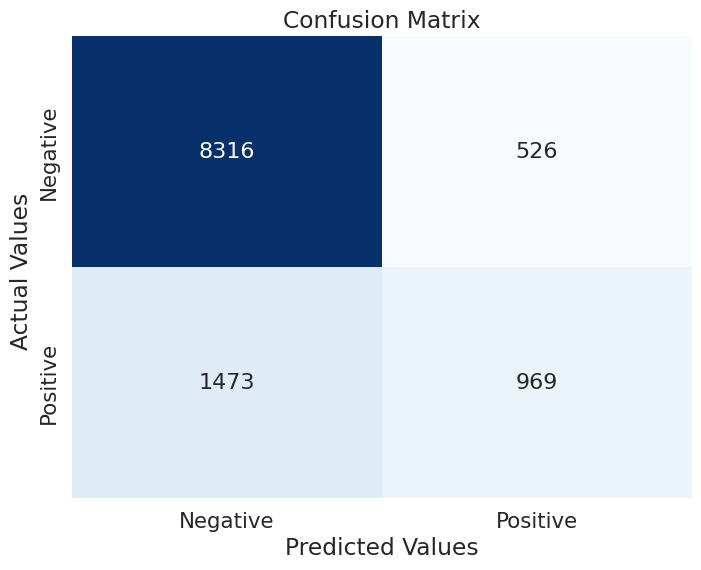

In [27]:
#Generate confusion matrix
conf_matrix = confusion_matrix(YTest, YPred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},
            fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],  # Set column labels
            yticklabels=['Negative', 'Positive'])  # Set row labels
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ')
plt.title('Confusion Matrix')
plt.show()

**Accuracy**

In [28]:
accuracy_Test = log_reg.score(Scaled_XTest, YTest)
accuracy_Train = log_reg.score(Scaled_XTrain, YTrain)
labels = ['With Test Data', 'With Training Data']
accuracies = [accuracy_Test * 100,accuracy_Train * 100]

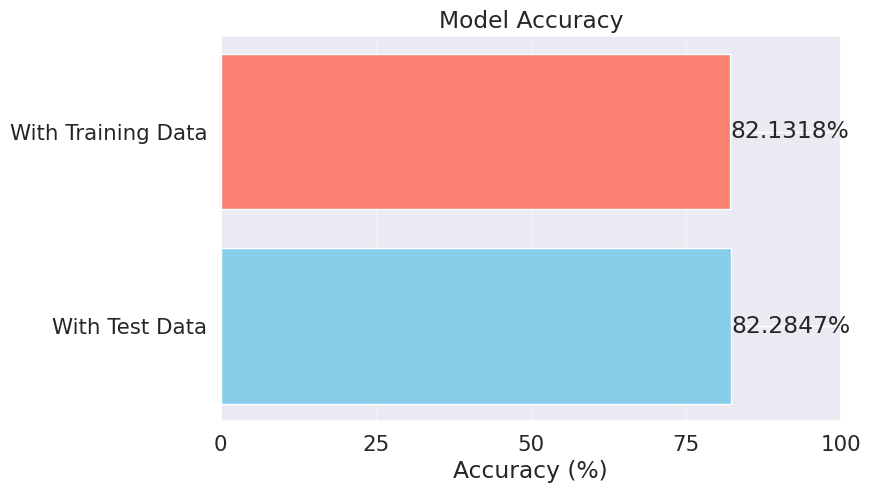

In [29]:
# Create horizontal bar graph
plt.figure(figsize=(8, 5))
plt.barh(labels, accuracies, color=['skyblue', 'salmon'])
plt.xlabel('Accuracy (%)')  # Adjusted xlabel for clarity
plt.title('Model Accuracy')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Adjusted alpha value for grid visibility

# Display the values on the bars
for i, acc in enumerate(accuracies):
    plt.text(acc, i, f'{acc:.4f}%', va='center')

plt.xticks(ticks=[0, 25, 50, 75, 100], labels=['0', '25', '50', '75', '100'])
plt.show()